**NOTA BENE** 

Se volete  modificare la classe, fatte un altro file Calibration.py

## Importing libraries and creating the fundamental folders

In [1]:
import os 

import numpy as np
from astropy.io import fits

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import optimize

from Characterization_j import CCD_camera

## Create Master Bias ATIK 460
This is the case of the images produced by monochromatic CCDs. The data is stored in a NxM matrix, each element containing the ADUs of a pixel.

In [2]:
##mean averaging filter
main_dir =os.getcwd()
bias_dir = os.path.join(main_dir,"data/ATIK460/Bias")
dark_dir = os.path.join(main_dir,"data/ATIK460/Dark")                             
flat_dir = os.path.join(main_dir,"data/ATIK460/Flat")

In [3]:
#reading files
files=sorted(os.listdir(bias_dir))
single_ccd_exposure_filename=[]
for file in files:
    if os.path.isfile(os.path.join(bias_dir, file)):
        single_ccd_exposure_filename=np.append(single_ccd_exposure_filename, file) 
        
single_image=[fits.getdata(os.path.join(bias_dir,frame), ext=0) for frame in single_ccd_exposure_filename]

#calculating mean_image
final_image = np.sum(single_image, axis=0)
mean_image=np.asarray(final_image/len(single_ccd_exposure_filename),float)

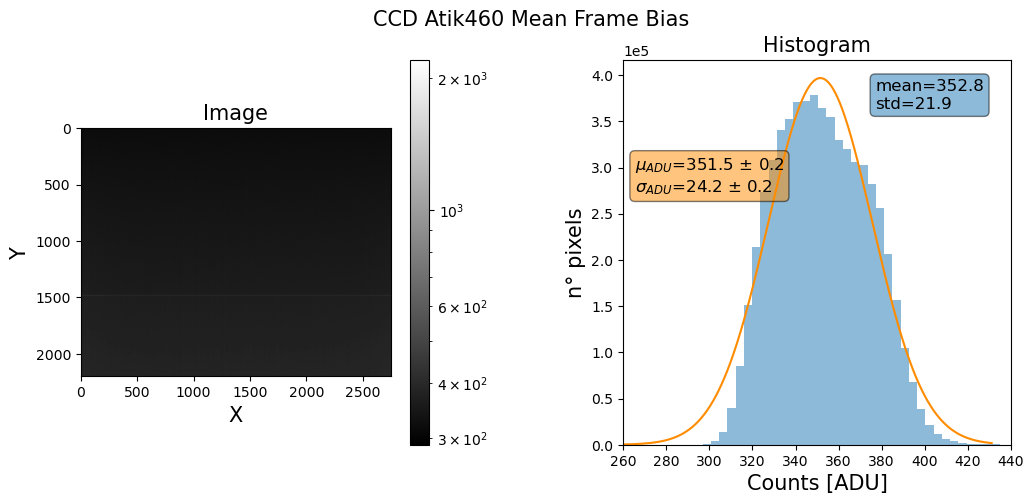

In [4]:
r_fig = plt.figure(figsize=(12,5))
r_fig.suptitle("CCD Atik460 Mean Frame Bias",fontsize=15)

#Display image
r_ax1 = plt.subplot(1, 2, 1)
r_ax1.set_title("Image",fontsize=15)
r_ax1.set_xlabel("X",fontsize=15)
r_ax1.set_ylabel("Y",fontsize=15)

r_img = r_ax1.imshow(mean_image, cmap='gray',norm=LogNorm())
plt.colorbar(r_img)

#Display histogram of image counts
r_ax2 = plt.subplot(1, 2, 2)
plt.subplots_adjust(wspace=0.4)
r_ax2.set_title("Histogram",fontsize=15)
r_ax2.set_xlabel("Counts [ADU]",fontsize=15)
r_ax2.set_ylabel("n° pixels",fontsize=15)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
bin_heights, bin_borders, _=r_ax2.hist(mean_image.flatten(),bins=500,alpha=0.5)

#Get some statistics
r_mean = np.mean(mean_image)
r_std = np.std(mean_image)
plt.xlim([260,440])

#Place in a text box
r_text = '\n'.join((
    'mean=%.1f' % (r_mean ),
    'std=%.1f' % (r_std )))

#Place the text box in upper left (using axes coordinates)
props = dict(boxstyle='round', alpha=0.5)
r_ax2.text(0.65, 0.95, r_text, transform=r_ax2.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

#fitting to a gaussian model
def model_gauss(x,A,x0,sigma):
    return A*np.exp(-np.power((x-x0),2.)/(2.*sigma**2))

bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
init=[np.max(bin_heights),r_mean,r_std]
popt,pcov= optimize.curve_fit(model_gauss,bin_centers, bin_heights,p0=init)
error=np.sqrt(pcov.diagonal())

x_interval_for_fit = np.linspace(260, np.max(mean_image)-1775, 10000)
plt.plot(x_interval_for_fit,model_gauss(x_interval_for_fit,*popt),color='darkorange')

#Place in a text box the results of fit
fit_text = '\n'.join((
    '$\mu_{ADU}$=%.1f $\pm$ %.1f' % (popt[1],error[1]),
    '$\sigma_{ADU}$=%.1f $\pm$ %.1f' % (popt[2],error[2])))

props = dict(boxstyle='round', facecolor='darkorange', alpha=0.5)
r_ax2.text(0.03, 0.75, fit_text, transform=r_ax2.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

#saving graph
main_dir = os.getcwd()
results_julia_dir = os.path.join(main_dir,"results_julia")
if not os.path.exists(results_julia_dir):
    os.mkdir(results_julia_dir)
output_filename = os.path.join(results_julia_dir,'CCD Atik460 Mean Frame Bias')
plt.savefig(output_filename+".png")

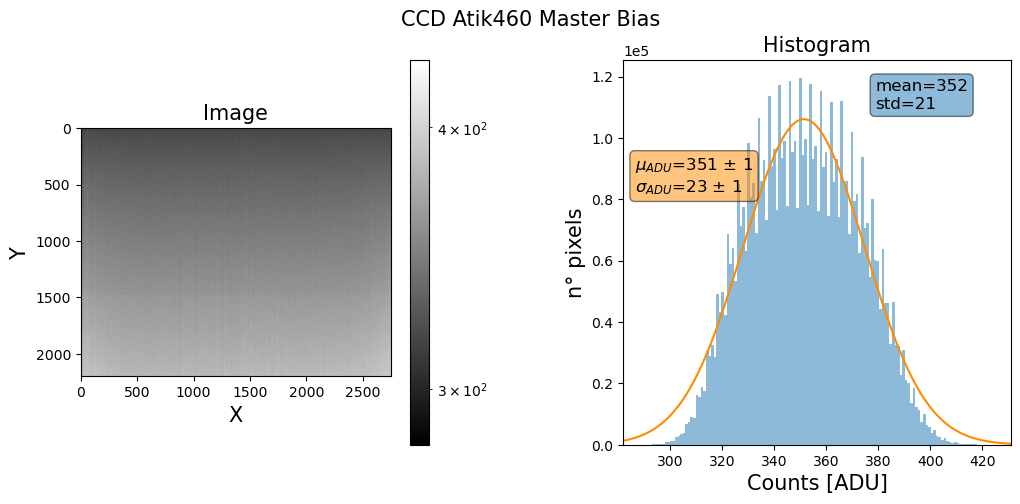

In [5]:
atik=CCD_camera("CCD Atik460", bias_dir, dark_dir,flat_dir)

atik.plot_master_bias(fit='True')

*NOTA BENE*: sigma_ADU=𝑅𝑒𝑎𝑑 𝑁𝑜𝑖𝑠𝑒/𝐺𝑎𝑖𝑛

## Calculate the Dark Current ATIK 460

0.1s-> mean=-0.79 $\pm$ 0.69 [ADU], std=17.16 $\pm$ 0.69 [ADU]
1s-> mean=0.07 $\pm$ 0.23 [ADU], std=17.21 $\pm$ 0.23 [ADU]
5s-> mean=3.33 $\pm$ 0.10 [ADU], std=17.33 $\pm$ 0.10 [ADU]
10s-> mean=6.98 $\pm$ 0.08 [ADU], std=17.46 $\pm$ 0.08 [ADU]
30s-> mean=19.65 $\pm$ 0.09 [ADU], std=18.01 $\pm$ 0.09 [ADU]
50s-> mean=29.77 $\pm$ 0.09 [ADU], std=18.46 $\pm$ 0.09 [ADU]
70s-> mean=43.81 $\pm$ 0.09 [ADU], std=19.09 $\pm$ 0.09 [ADU]
85s-> mean=53.77 $\pm$ 0.09 [ADU], std=19.65 $\pm$ 0.09 [ADU]
100s-> mean=70.68 $\pm$ 0.09 [ADU], std=20.46 $\pm$ 0.09 [ADU]
Chisq ridotto 0.02
dark current: 0.11 $\pm$ 0.03 10^{-6} $e{^-}/s/pix$
dark current: 0.67 $\pm$ 0.17 $e{^-}/s$


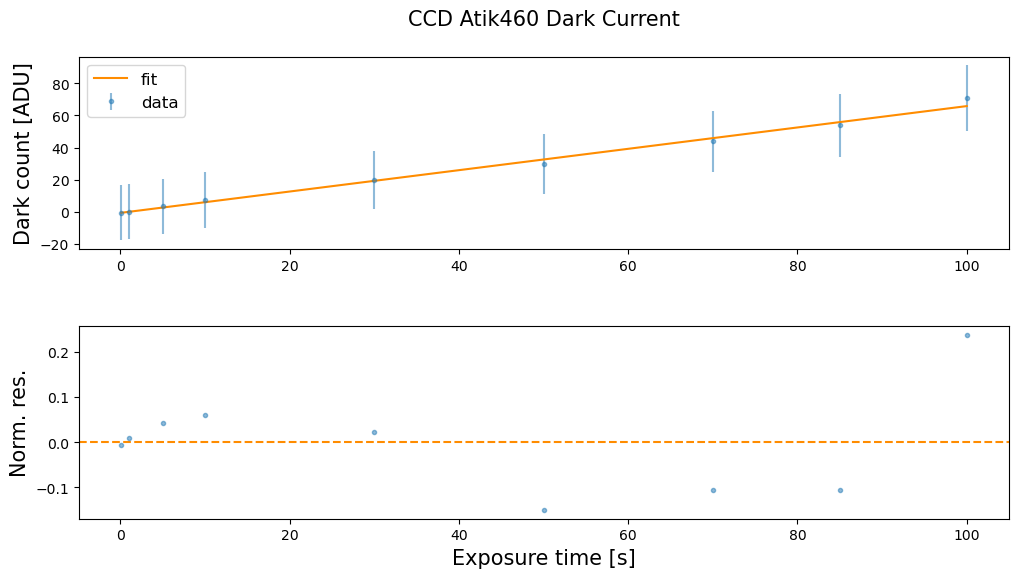

In [6]:
atik.dark_current(2750*2200)

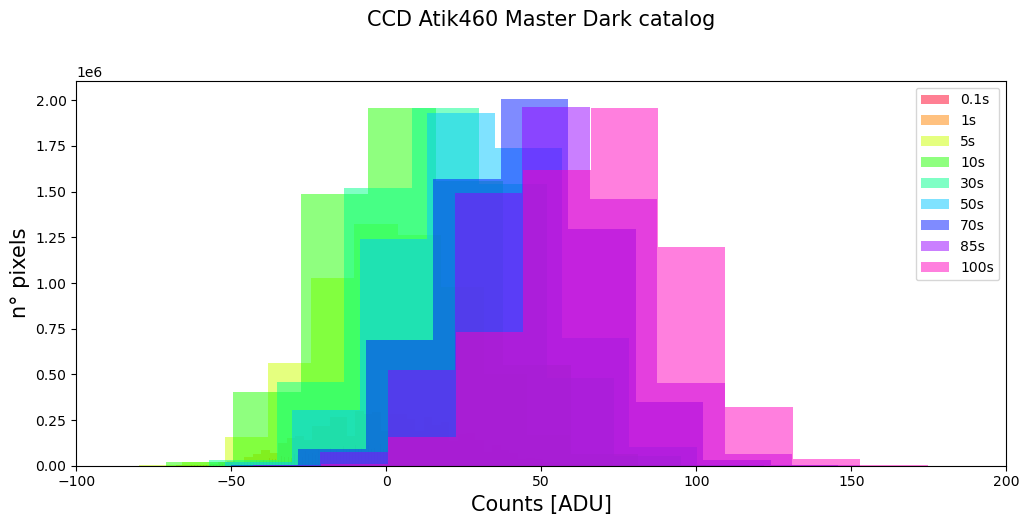

In [7]:
atik.plot_master_dark_catalog()

## Calculate gain ATIK 460

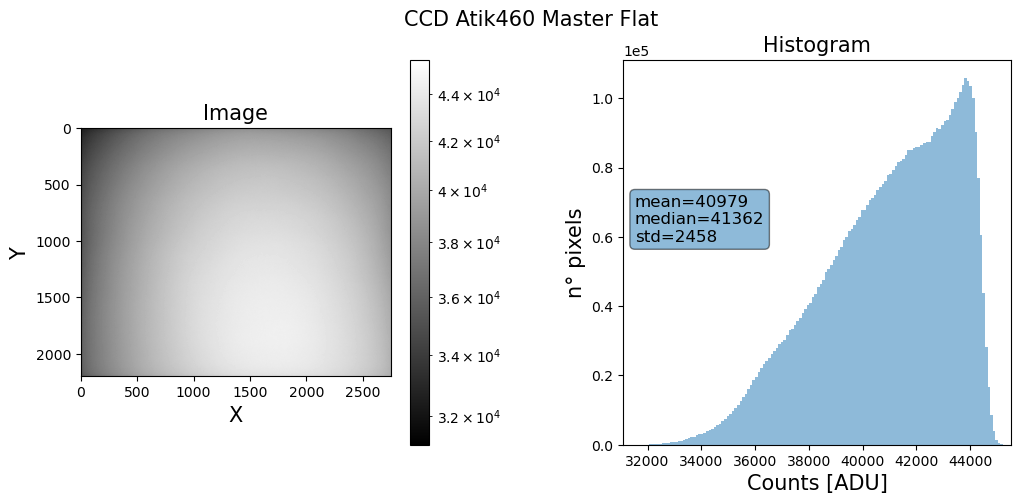

In [8]:
atik.plot_master_flat(fit='False')

*NOTA BENE*: sigma_ADU=Flat Field 𝑁𝑜𝑖𝑠𝑒/𝐺𝑎𝑖𝑛 nel caso in cui fosse stato effettivamente gaussiano

In [9]:
atik.calculate_gain_readnoise('Bias_004.fits', 'Bias_005.fits', 'Flat_015.fits', 'Flat_016.fits')

mb1 350.67 $\pm$ 1.90
sb1 33.46 $\pm$ 1.90
mb2 349.20 $\pm$ 1.89
sb2 33.08 $\pm$ 1.89
mb12 1.40 $\pm$ 1.77
sb12 38.97 $\pm$ 1.77
mf1 37999.65 $\pm$ 48.22
sf1 2545.06 $\pm$ 51.80
mf2 44119.09 $\pm$ 55.44
sf2 2753.34 $\pm$ 59.69
mf12 6004.89 $\pm$ 1.66
sf12 626.86 $\pm$ 1.66
gain 0.208 $\pm$ 0.002 $e^{-s}/ADU$
readout noise 5.73 $\pm$ 0.26 ADU


In [10]:
readout_noise=5.7
gain=0.208
sigma_adu_att=readout_noise/gain